In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)
session.query(Station.station, Station.name).all()

[('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00513117', 'KANEOHE 838.1, HI US'),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 ('USC00517948', 'PEARL CITY, HI US'),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US'),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US'),
 ('USC00519281', 'WAIHEE 837.5, HI US'),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US')]

# Exploratory Precipitation Analysis

In [76]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

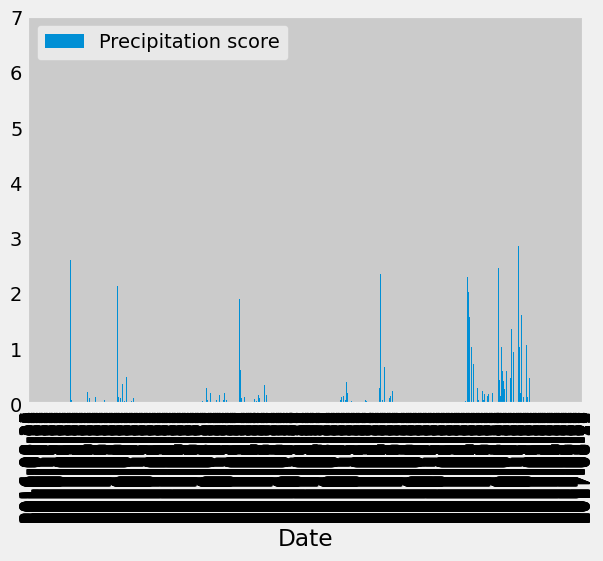

In [21]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
year_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > year_ago).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(year_prcp, columns = ['Date', 'Precipitation score'])
df.set_index('Date', inplace =True)


# Sort the dataframe by date
df_sourt = df.sort_values(by=['Date'])

# Use Pandas Plotting with Matplotlib to plot the data

import matplotlib.ticker as ticker

df.plot.bar()
plt.xticks(rotation="vertical")
plt.show()




In [78]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()


,Precipitation score
count,16082.000000
mean,0.158553
std,0.469659
min,0.000000
25%,0.000000
50%,0.010000
75%,0.100000
max,11.530000


# Exploratory Station Analysis

In [79]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station.id).distinct().count()
station_count

9

In [80]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
sel = [Measurement.station, func.count(Measurement.id)]
station_data_count= session.query(*sel).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).all()
station_data_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [81]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [Measurement.station,
    func.min(Measurement.tobs),
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs)]

active_station = session.query(*sel).\
    filter(Measurement.station == "USC00519281").all()

active_station

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

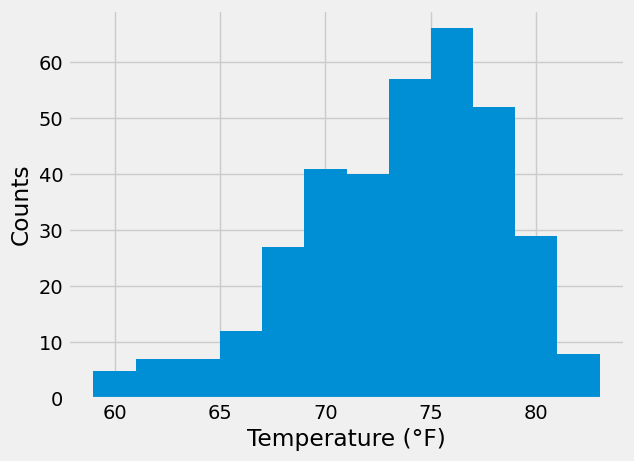

In [93]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station_year = session.query(Measurement.tobs).\
    filter(Measurement.date > year_ago).\
    filter(Measurement.station == "USC00519281").\
    order_by(Measurement.tobs).all()

active_station_year

temp_df = pd.DataFrame(active_station_year, columns = ['temp'])
plt.hist(temp_df, bins=12)
plt.xlabel('Temperature (°F)')
plt.ylabel('Counts')
plt.show()
#temp_df
#temp_df.plot.bar()
#plt.show()


# Close session

In [67]:
# Close Session
session.close()